In [41]:
'''

More than 500 Images(containg the pictures of acoustic,tabby,chihuahua,violin,laptop,church,airline,german,arabian)
are present in the folder "Images". 
VGG16 is used to recognize the image content and move each image to its name folder. 
Suppose if its aeroplane image than it should move to the folder name "airliner".
If its Violin image it should be move to "Violin" folder. 

'''

'\n\nMore than 500 Images(containg the pictures of acoustic,tabby,chihuahua,violin,laptop,church,airline,german,arabian)\nare present in the folder "Images". \nVGG16 is used to recognize the image content and move each image to its name folder. \nSuppose if its aeroplane image than it should move to the folder name "airliner".\nIf its Violin image it should be move to "Violin" folder. \n\n'

In [42]:
import os
os.chdir("/Users/shreyasrane87/Desktop/Github/ImageClassifier")

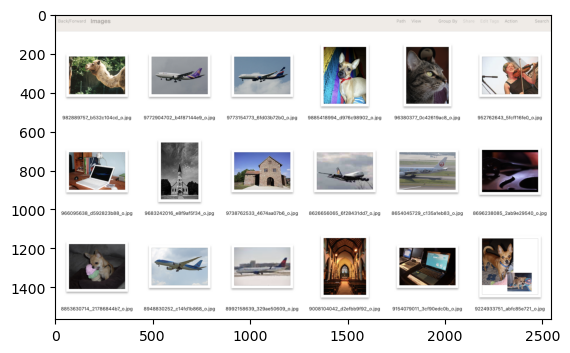

In [43]:
#We have 1 folder name “Images” containg more than 500 images for acoustic, tabby, chihuahua, violin, laptop, church, airline, german & arabian.
from matplotlib import image as img
from matplotlib import pyplot as plt
image = img.imread("Pre_details_of_folder.png")
plt.imshow(image)


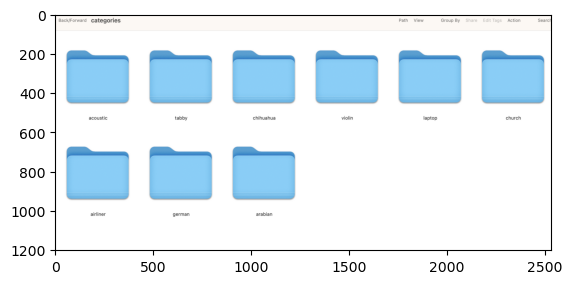

In [44]:
#We should divide above the "Images Folder" into subfolder containg the images of its categories.
image = img.imread("Catogries_Folder.png")
plt.imshow(image)

In [45]:
#importing standard library
from keras.applications.vgg16 import VGG16, preprocess_input,decode_predictions
from keras_preprocessing.image import load_img,img_to_array
import numpy as np
import glob
from PIL import Image
import pandas as pd
from shutil import move
import shutil


In [46]:
#If Imageclassifier exists it will delete that folder
try:
    folder_path = '/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier'
    shutil.rmtree(folder_path)
except:
    pass


In [47]:
#Copy Images folder to  Imageclassifier.
os.mkdir('/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier')
source='/Users/shreyasrane87/Desktop/Github/ImageClassifier/Images/'
destination='/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/'

In [48]:

files = os.listdir(source)
for file_name in files:
   shutil.copy(source+file_name, destination+file_name)

In [49]:
import os
for dirname, _, filenames in os.walk('/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier'):
    for filename in filenames:
        os.path.join(dirname, filename)
        


In [50]:
#creating folder in destination folder named 'catogories'

os.chdir('/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/')
dir='/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/'

In [51]:
#creating new folder, as random_pics aree in read only folder
from distutils.dir_util import copy_tree

# copy subdirectory example
fromDirectory = "/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier"
toDirectory = "/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/"

copy_tree(fromDirectory, toDirectory)



['/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/15843999703_2423e96bd6_o.jpg',
 '/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/1425035835_6a34f94a26_o.jpg',
 '/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/26376462748_9b7fa4b443_o.jpg',
 '/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/3203047344_8ff3d15f88_o.jpg',
 '/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/16545377701_3fd5cca5fb_o.jpg',
 '/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/8233662249_625494c120_o.jpg',
 '/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/8477647595_f3d0b758f7_o.jpg',
 '/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/3434646179_5b1e9d3e49_o.jpg',
 '/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/15960062828_538f0f9e39_o.jpg',
 '/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/7617390754_75d38008cb_o.jp

In [52]:
#we have 3 .png images. Converting them into .jpg and removing .ong files
im = Image.open("3722422954_4e310ac2d2_o.png")
rgb_im = im.convert('RGB')
rgb_im.save('3722422954_4e310ac2d2_o.jpg')

im = Image.open("8397706906_fe4d96a3a9_o.png")
rgb_im = im.convert('RGB')
rgb_im.save('8397706906_fe4d96a3a9_o.jpg')


im = Image.open("31974731330_f3dfe2c393_o.png")
rgb_im = im.convert('RGB')
rgb_im.save('31974731330_f3dfe2c393_o.jpg')

os.remove('3722422954_4e310ac2d2_o.png')
os.remove('8397706906_fe4d96a3a9_o.png')

os.remove('31974731330_f3dfe2c393_o.png')

In [53]:
#Adding the name all images in files object
files=glob.glob("*.jpg")

In [54]:
#preprocessing images for VGG16 model
def preprocess(im):
    im=img_to_array(im)
    im=np.expand_dims(im,axis=0)
    im=preprocess_input(im)
    return im[0]

imag1=[]
for i in files:
    im=load_img(i,target_size=(224,224,3))
    imag1.append(preprocess(im))

In [55]:
#converting filesname into dataframe
name=pd.DataFrame(files,columns=['file'])


In [56]:
#Converting pixels into numpy array
pixels=(np.array(imag1))
pixels.shape

(578, 224, 224, 3)

In [57]:
#defining VGG16
model=VGG16()

In [58]:

base_model=VGG16(include_top=True,pooling='avg',input_shape=(224,224,3),weights = 'imagenet')

In [59]:
#Predict model for the images
pred = base_model.predict(pixels)


19/19 [==============================] - 52s 3s/step


In [60]:
#converting predictions into dataframe
pred_name=decode_predictions(pred,top=1)
prediti=pd.DataFrame(pred_name,columns=['Predictions'])
prediti.shape

(578, 1)

In [61]:
#creating dataframe cby concat
data4=pd.concat([prediti, name], axis=1)

In [62]:
data4.head()

,Predictions,file
0,"(n02690373, airliner, 0.9540368)",15843999703_2423e96bd6_o.jpg
1,"(n02085620, Chihuahua, 0.6810382)",1425035835_6a34f94a26_o.jpg
2,"(n02085620, Chihuahua, 0.9410489)",26376462748_9b7fa4b443_o.jpg
3,"(n02085620, Chihuahua, 0.9836083)",3203047344_8ff3d15f88_o.jpg
4,"(n02085620, Chihuahua, 0.42059752)",16545377701_3fd5cca5fb_o.jpg


In [63]:
#Doing basic funtions into dataframe
data4 = data4.astype(str) 

data4[['Class_ID','folder','Probability']] = data4.Predictions.str.split(",",expand=True) 
data4['folder']=data4.folder.str.replace("[({':]", "")

/var/folders/mk/w5v6m8s178qb6zq684k2w9xh0000gn/T/ipykernel_3534/1303542075.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data4['folder']=data4.folder.str.replace("[({':]", "")


In [64]:
#Changing file and folder name according to requirement
data4['folder_name']=data4['folder'] 
data4["folder_name"]= data4["folder_name"].str.replace("acoustic_guitar", "acoustic",case = False) 
data4["folder_name"]= data4["folder_name"].str.replace("Arabian_camel", "arabian",case = False) 
data4["folder_name"]= data4["folder_name"].str.replace("German_shepherd", "german",case = False)
data4["folder_name"]= data4["folder_name"].str.replace("Chihuahua", "chihuahua",case = False)

In [65]:
#csv file
data5=data4[['file','folder_name']]
data5.to_csv('submission.csv',index=False)

In [66]:
#creating new dataframe for creating folder
df=data4[['file','folder_name']]
data5.shape

(578, 2)

In [67]:
#dividing images into subfolders

all_images = files
cat='/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/categories'
os.mkdir('/Users/shreyasrane87/Desktop/Github/ImageClassifier/Imageclassifier/categories')
co = 0
for image in all_images:
    print(image)
    folder_name = df[df['file'] == image]['folder_name']
    folder_name = list(folder_name)[0]
    if not os.path.exists(os.path.join('categories', folder_name)):
        os.mkdir(os.path.join('categories', folder_name))

    path_from = os.path.join(dir, image)
    path_to = os.path.join('categories', folder_name, image)

    move(path_from, path_to)
    #'Moved {} to {}'.format(image, path_to)
    co += 1
else:
    pass


15843999703_2423e96bd6_o.jpg
1425035835_6a34f94a26_o.jpg
26376462748_9b7fa4b443_o.jpg
3203047344_8ff3d15f88_o.jpg
16545377701_3fd5cca5fb_o.jpg
8233662249_625494c120_o.jpg
8477647595_f3d0b758f7_o.jpg
3434646179_5b1e9d3e49_o.jpg
15960062828_538f0f9e39_o.jpg
7617390754_75d38008cb_o.jpg
11754485183_1b697acd0d_o.jpg
8433071382_4d64a39d4c_o.jpg
15722275729_9229318514_o.jpg
14520686827_8a10d34035_o.jpg
16518924203_9062f193db_o.jpg
3515997161_3cb6c807f2_o.jpg
4463065453_041beed7a3_o.jpg
6974131876_472044ce8a_o.jpg
25299098883_62852f1cdb_o.jpg
15239087005_55478d5b3f_o.jpg
13927978152_f5e53bdbd6_o.jpg
5258758544_9d77d4e252_o.jpg
615912163_36427a1cdb_o.jpg
15191519660_1a98fc8ed5_o.jpg
14771820449_4dc3fe30ef_o.jpg
3931791545_b4127dab07_o.jpg
4831275371_4ee407df9d_o.jpg
5428657406_4233500280_o.jpg
19580230278_67825273f2_o.jpg
9772904702_b4f87144e9_o.jpg
16201234911_2f47cc2f87_o.jpg
4358896867_8298332122_o.jpg
3486467483_345ff574a9_o.jpg
21174304131_515a3ef7db_o.jpg
356923840_6264377db9_o.jpg
604397